<h4>Ejercicio1</h4>
<ol>
<li><span style="color: #ff0000;">Define (5 puntos)</span> una funci&oacute;n de SAGE $frecuencia\_fib(N)$ que tenga como argumento un entero $N$ y devuelva la lista de frecuencias de cada uno de los d&iacute;gitos (1,2,3,4,5,6,7,8,9) como d&iacute;gito dominante (i.e. el primero por la izquierda) de los n&uacute;meros en la sucesi&oacute;n de Fibonacci que empezando en $1$&nbsp; tiene&nbsp; longitud $N$. <span style="color: #ff0000;">Representa (1 punto) gr&aacute;ficamente</span> las frecuencias obtenidas. Trata de programar esta funci&oacute;n de la forma m&aacute;s eficiente posible. </li>
<li>Denotemos por $F$ la lista que devuelve $frecuencia\_fib(20000)$. <span style="color: #ff0000;">Compara (1 punto)</span>, usando una funci&oacute;n de SAGE, los valores $F[i]$ con los n&uacute;meros&nbsp; $B[i]:=log_{10}(1+\frac{1}{i+1})$.&nbsp; Decimos que una sucesi&oacute;n cumple la "Ley de Benford" si la frecuencia del d&iacute;gito $i$ como d&iacute;gito dominante en los t&eacute;rminos de la sucesi&oacute;n es, con "muy buena aproximaci&oacute;n",&nbsp; $B[i].$</li>
<li><span style="color: #ff0000;">Modifica (2 puntos)</span> la funci&oacute;n del apartado $1$ para calcular las mismas frecuencias pero para la sucesi&oacute;n de potencias $2^j$ con $j$ recorriendo los enteros en el intervalo $[1,N]$. &iquest;Qu&eacute; observas al calcular las frecuencias con $N=20000$?</li>
<li><span style="color: #ff0000;">Modifica (1 punto)</span> la funci&oacute;n del apartado $2$ para calcular las mismas frecuencias pero para  la sucesi&oacute;n de enteros en el  intervalo $[1,N]$, y tambi&eacute;n para la sucesi&oacute;n de&nbsp; cuadrados&nbsp; $j^2$ con $j$ recorriendo los enteros en el  intervalo $[1,N]$. &iquest;Qu&eacute;&nbsp; observas al calcular las frecuencias con $N=20000$?</li>
</ol>
<p>La "Ley de Benford" se cumple para muchas sucesiones generadas mediante una expresi&oacute;n matem&aacute;tica (NO para todas), y para muchas sucesiones de datos num&eacute;ricos obtenidos del mundo real, por ejemplo, mediante estad&iacute;sticas. &iquest;Cu&aacute;l puede ser la &nbsp; diferencia fundamental entre sucesiones que cumplen bien la Ley de Benford y las que la cumplen medio bien o no la cumplen?</p>

<h4>Apartado 1</h4>

<p><span style="color: #ff0000;">En esta primera celda comprobamos una l&iacute;nea que produce los d&iacute;gitos dominantes de los primeros nueve n&uacute;meros de fibonacci.</span></p>

In [1]:
L = [(fibonacci(j)).digits()[-1:][0] for j in srange(1,10)];L

[1, 1, 2, 3, 5, 8, 1, 2, 3]

<p><span style="color: #ff0000;">Empezamos con la lista $L$ de longitud nueve que va a almacenar las frecuencias como una lista de ceros, y para cada $j$ entero en el intervalo $[1,N]$ calculamos el d&iacute;gito dominante del n&uacute;mero de Fibonacci $j$-&eacute;simo e incrementamos la frecuencia del d&iacute;gito resultante en $1/N$. As&iacute; la frecuencia del uno es el primer elemento ($L[0]$) en la lista $L$, una vez que ha terminado el bucle, la frecuencia del dos el segundo ($L[1]$), etc.</span></p>

In [2]:
def frecuencia_fibon(N):
    L = [0]*9
    for j in xrange(1,N):
        k = ((fibonacci(j)).digits())[-1:][0]
        L[k-1] += (1/N).n()
    return L

In [3]:
time L = frecuencia_fibon(20000);L

CPU times: user 5.58 s, sys: 96 ms, total: 5.68 s
Wall time: 5.58 s


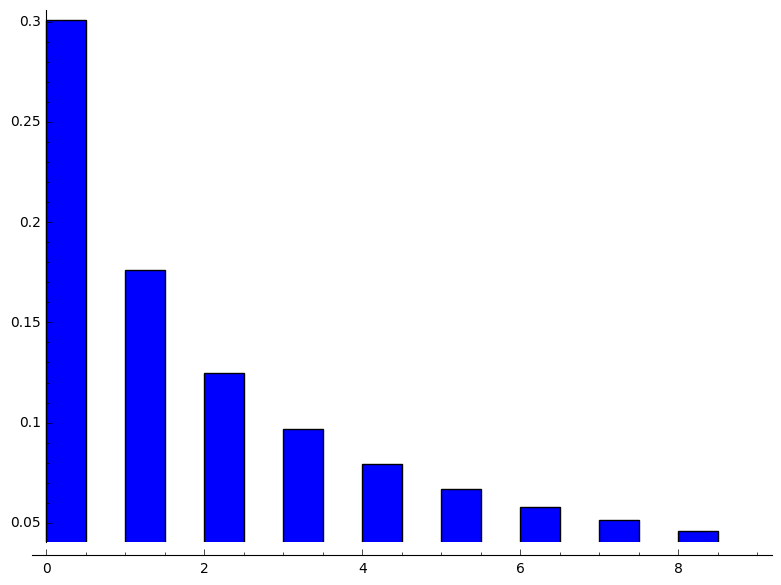

In [4]:
bar_chart(L)

<h4>Apartado 2</h4>

In [5]:
B = [log((1+1/(i+1)),base=10).n() for i in srange(9)];B

[0.301029995663981,
 0.176091259055681,
 0.124938736608300,
 0.0969100130080564,
 0.0791812460476248,
 0.0669467896306132,
 0.0579919469776867,
 0.0511525224473813,
 0.0457574905606751]

In [6]:
DIF = [L[j]-B[j] for j in srange(9)];DIF

[-0.0000299956640061327,
 8.74094430755590e-6,
 0.0000112633916944938,
 -0.0000600130080589123,
 0.0000187539523746338,
 -0.0000467896306124149,
 -0.0000419469776855794,
 0.0000974775526196708,
 -7.49056067434611e-6]

<p><span style="color: #ff0000;">La aproximaci&oacute;n es bastante buena: en todos los casos al menos $4$ cifras decimales iguales. Incluso, podr&iacute;a ocurrir que con $N$ mayores la aproximaci&oacute;n mejorara.</span></p>

<h4>Apartado 3</h4>

In [7]:
def frecuencia_pot(N):
    L = [0]*9
    for j in xrange(1,N):
        k = (Integer(2^j).digits())[-1:][0]
        L[k-1] += (1/N).n()
    return L

In [8]:
time L2 = frecuencia_pot(20000);L2

CPU times: user 6.26 s, sys: 40 ms, total: 6.3 s
Wall time: 6.26 s


<p><span style="color: #ff0000;">Las frecuencias son muy similares a las producidas para la sucesi&oacute;n de Fibonacci y cumplen muy bien la Ley de Benford:</span></p>

In [9]:
DIF2 = [L2[j]-B[j] for j in srange(9)];DIF2

[-0.0000299956640061327,
 0.0000587409443075504,
 -0.0000887366083054952,
 0.0000399869919410767,
 0.0000187539523746338,
 3.21036938757957e-6,
 -0.0000919469776855808,
 0.0000474775526196694,
 -7.49056067434611e-6]

<h4>Apartado 4</h4>

In [10]:
def frecuencia_cuadr(N):
    L = [0]*9
    for j in xrange(1,N):
        k = (Integer(j^2).digits())[-1:][0]
        L[k-1] += (1/N).n()
    return L

In [11]:
time L3 = frecuencia_cuadr(20000);L3

CPU times: user 2.18 s, sys: 124 ms, total: 2.3 s
Wall time: 2.25 s


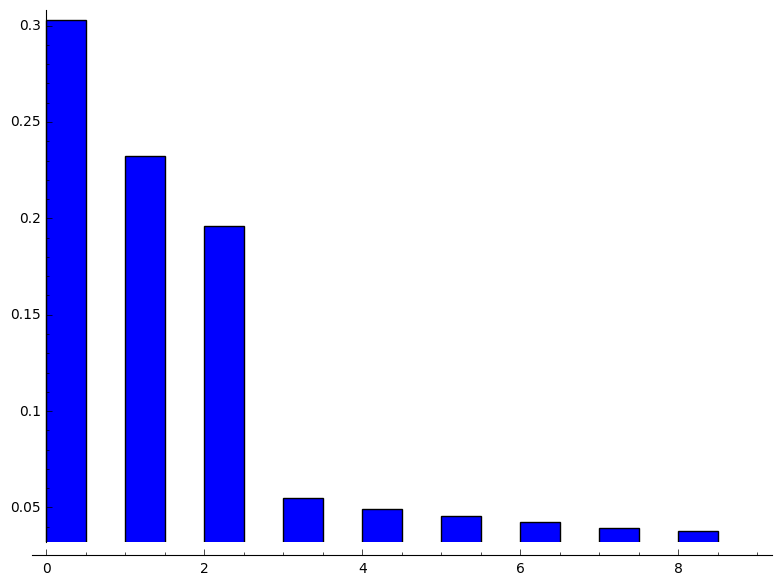

In [12]:
bar_chart(L3)

In [13]:
DIF3 = [L3[j]-B[j] for j in srange(9)];DIF3

[0.00202000433599364,
 0.0562587409443014,
 0.0708612633916867,
 -0.0421600130080554,
 -0.0299812460476239,
 -0.0215467896306124,
 -0.0157419469776860,
 -0.0116025224473807,
 -0.00815749056067458]

In [14]:
def frecuencia_enteros(N):
    L = [0]*9
    for j in xrange(1,N):
        k = (Integer(j).digits())[-1:][0]
        L[k-1] += (1/N).n()
    return L

In [15]:
time L4 = frecuencia_enteros(20000);L4

CPU times: user 2.17 s, sys: 12 ms, total: 2.18 s
Wall time: 2.17 s


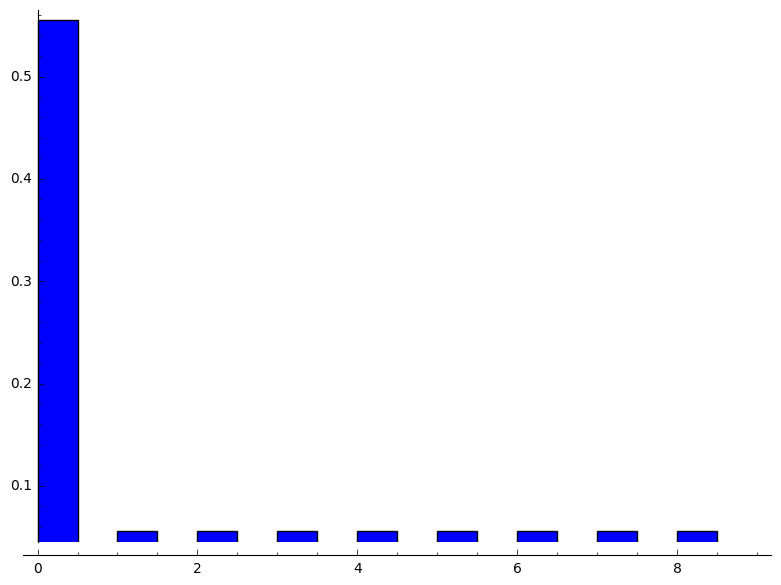

In [16]:
bar_chart(L4)

In [17]:
DIF4 = [L4[j]-B[j] for j in srange(9)];DIF4

[0.254520004335966,
 -0.120541259055680,
 -0.0693887366082988,
 -0.0413600130080553,
 -0.0236312460476237,
 -0.0113967896306121,
 -0.00244194697768565,
 0.00439747755261979,
 0.00979250943932593]

In [18]:
L5 = frecuencia_enteros(10000);print L5

[0.111100000000002, 0.111100000000002, 0.111100000000002, 0.111100000000002, 0.111100000000002, 0.111100000000002, 0.111100000000002, 0.111100000000002, 0.111100000000002]


<p><span style="color: #ff0000;">En este &uacute;ltimo caso no se cumple la Ley de Benford ni de lejos, mientras que para los cuadrados se produce un decrecimiento en las frecuencias pero se produce un salto muy fuerte entre la frecuencia del $3$ y la del $4$ que no se da para las primeras dos sucesiones.&nbsp; &iquest;Qu&eacute; diferencia las primeras dos sucesiones (Fibonacci y potencias) de estas dos &uacute;ltimas? Una posible respuesta es que las dos primeras crecen mucho m&aacute;s deprisa, y, de hecho, las dos primeras son muy similares porque la de Fibonacci crece, como ya hemos visto,&nbsp; esencialmente como $\varphi^j/\sqrt{5}$ con $\varphi=(1+\sqrt{5})/2$ , es decir las dos crecen como las potencias de un n&uacute;mero mayor que $1$ con exponentes crecientes.</span></p>

